In [13]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score, confusion_matrix  
from sklearn.metrics import accuracy_score


In [14]:
data = pd.read_csv('diabetes.csv')
data = pd.DataFrame(data)

In [15]:
print(len(data))
data.head()

768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
zero_data = ['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']
for coloumn in zero_data:
    data[coloumn] = data[coloumn].replace(0, np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN, mean)

In [37]:
x = data.iloc[:, 0:8]
y = data.iloc[:, 8]


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

In [50]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [51]:
import math 
print(math.sqrt(len(y_test)))
model = KNeighborsClassifier(n_neighbors = 11, p = 2, metric ='euclidean')

12.409673645990857


In [52]:
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [53]:
pred = model.predict(x_test)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [61]:
print(np.unique(y_test))  # Actual values
print(np.unique(pred))     # Predicted values


[1.]
[1.]


In [45]:
cn = confusion_matrix(y_test, pred)
print(cn)

[[154]]


In [47]:
print(accuracy_score(y_test,pred))
print(f1_score(y_test, pred))

1.0
1.0


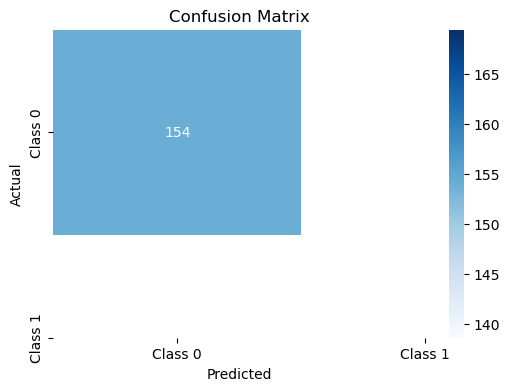

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
